In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
# !unzip "/content/archive.zip" -d "data"




1.   Which countries hosted the olymics the most? and how many countries that had never hosted the event?
<br/>
2.   Which countries participate the most in the olympics?
<br/>
3.   Does having the most medals means being good at many games?
<br/>
4.   Do some countries achieve most of their medals in certain sports only? 
<br/>
5.   Is there a boom in female participation a certain year? do all countries   have similar history?
<br/>
6.   Do countries with more female participation achieve more medals
<br/>
7.   Does Male Athletes of Egypt bring more medals in the olympics than their female counterpart? What about other countries?
<br/>
8.  Do the Countries with high female participation aquire more medals?
<br/>
9.  Does Egypt participate as much as it's north african neighbors?
<br/>
10.  Is there a correlation between height and weight and achieving medals in some sports such ad basketball, running and swimming?
<br/>
11.  Have the number of sports increased over the years?



# 3.Does having the most medals means being good at many games?

In [3]:
df_athelete_events= pd.read_csv("athlete_events.csv")
df_athelete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df_top10_countries = df_athelete_events.groupby(["Medal","Team"]).count()
df_top10_countries_Bronze = df_top10_countries[df_top10_countries.index.get_level_values("Medal") == "Bronze"]
df_top10_countries_Silver=df_top10_countries[df_top10_countries.index.get_level_values("Medal") == "Silver"]
df_top10_countries_Gold = df_top10_countries[df_top10_countries.index.get_level_values("Medal") == "Gold"]
df_top10_countries_Gold=df_top10_countries_Gold.reset_index(level=0,drop=True)
df_top10_countries_Silver=df_top10_countries_Silver.reset_index(level=0,drop=True)
df_top10_countries_Bronze=df_top10_countries_Bronze.reset_index(level=0,drop=True)
df_top10_countries  = df_top10_countries_Gold.add(df_top10_countries_Silver,fill_value=0)
df_top10_countries = df_top10_countries.add(df_top10_countries_Bronze,fill_value=0)
df_top10_countries=df_top10_countries.sort_values("Year",ascending=False)
df_top10_countries.head(10)

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event
Team,,,,,,,,,,,,,
United States,5219.0,5219.0,5219.0,5205.0,4467.0,4305.0,5219.0,5219.0,5219.0,5219.0,5219.0,5219.0,5219.0
Soviet Union,2451.0,2451.0,2451.0,2451.0,2226.0,2214.0,2451.0,2451.0,2451.0,2451.0,2451.0,2451.0,2451.0
Germany,1984.0,1984.0,1984.0,1970.0,1548.0,1529.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0
Great Britain,1673.0,1673.0,1673.0,1629.0,1042.0,1037.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0
France,1550.0,1550.0,1550.0,1520.0,1025.0,972.0,1550.0,1550.0,1550.0,1550.0,1550.0,1550.0,1550.0
Italy,1527.0,1527.0,1527.0,1521.0,1132.0,1012.0,1527.0,1527.0,1527.0,1527.0,1527.0,1527.0,1527.0
Sweden,1434.0,1434.0,1434.0,1434.0,786.0,758.0,1434.0,1434.0,1434.0,1434.0,1434.0,1434.0,1434.0
Australia,1306.0,1306.0,1306.0,1302.0,1219.0,1199.0,1306.0,1306.0,1306.0,1306.0,1306.0,1306.0,1306.0
Canada,1243.0,1243.0,1243.0,1234.0,1040.0,1027.0,1243.0,1243.0,1243.0,1243.0,1243.0,1243.0,1243.0


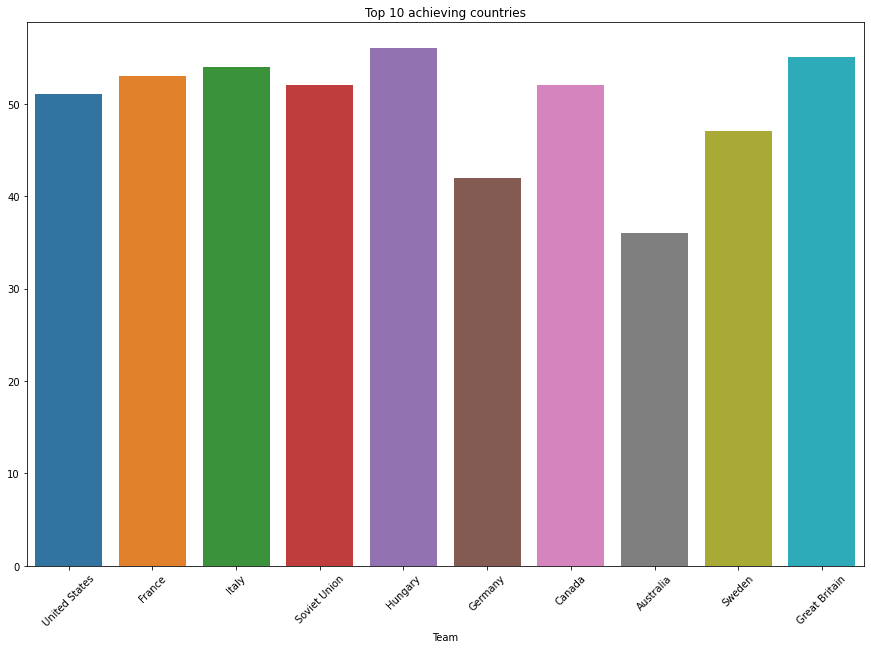

In [58]:
df =df_athelete_events.groupby(["Sport","Team"],sort = False).count()
y=[]
df_top10_achiveing= df[(df.index.get_level_values("Team")=="United States") | (df.index.get_level_values("Team")=="Soviet Union")|(df.index.get_level_values("Team")=="Germany") | (df.index.get_level_values("Team")=="Great Britain") | (df.index.get_level_values("Team")=="France")  | (df.index.get_level_values("Team")=="Italy") | (df.index.get_level_values("Team")=="Sweden") |(df.index.get_level_values("Team")=="Australia") | (df.index.get_level_values("Team")=="Canada") | (df.index.get_level_values("Team")=="Hungary") ]
for country, new_df in df_top10_achiveing.groupby(level=1):
    y.append(len(new_df.index))     
plt.figure(figsize =(15,10))
plt.title("Top 10 achieving countries")
sns.barplot(y =y,x = df_top10_achiveing.index.get_level_values("Team").unique())
locs, labels = plt.xticks()
x=plt.setp(labels,rotation=45)


# 11. Have the number of sports increased over the years? 

In [7]:
df_athelete_events= pd.read_csv("athlete_events.csv")
df_athelete_events


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [19]:
df_sport_team =df_athelete_events.groupby(["Year","Sport"]).count()
df_sport_team

ID  Name  Sex  Age  Height  Weight  Team  NOC  Games  \
Year Sport                                                                  
1896 Athletics      106   106  106   69      32      29   106  106    106   
     Cycling         41    41   41   19       0       0    41   41     41   
     Fencing         15    15   15    6       0       0    15   15     15   
     Gymnastics      97    97   97   73       9      15    97   97     97   
     Shooting        65    65   65   19       0       0    65   65     65   
...                 ...   ...  ...  ...     ...     ...   ...  ...    ...   
2016 Triathlon      110   110  110  110     110     109   110  110    110   
     Volleyball     283   283  283  283     283     283   283  283    283   
     Water Polo     258   258  258  258     258     258   258  258    258   
     Weightlifting  255   255  255  255     255     255   255  255    255   
     Wrestling      346   346  346  346     346     346   346  346    346   

                    Season  City  Event  Medal  
Year Sport                                      
1896 Athletics         106   106    106     37  
     Cycling            41    41     41     16  
     Fencing            15    15     15      9  
     Gymnastics         97    97     97     37  
     Shooting           65    65     65     15  
...                    ...   ...    ...    ...  
2016 Triathlon         110   110    110      6  
     Volleyball        283   283    283     72  
     Water Polo        258   258    258     78  
     Weightlifting     255   255    255     45  
     Wrestling         346   346    346     72  

[906 rows x 13 columns]

In [28]:
    number_of_sports=[]
    for year, new_df in df_sport_team.groupby(level=0):
        number_of_sports.append(len(new_df.index)) 
    number_of_sports

[9,
 20,
 18,
 13,
 24,
 17,
 25,
 30,
 25,
 25,
 32,
 29,
 27,
 27,
 27,
 31,
 30,
 33,
 33,
 33,
 35,
 37,
 41,
 12,
 31,
 14,
 34,
 15,
 34,
 15,
 34,
 15,
 32,
 15,
 34]

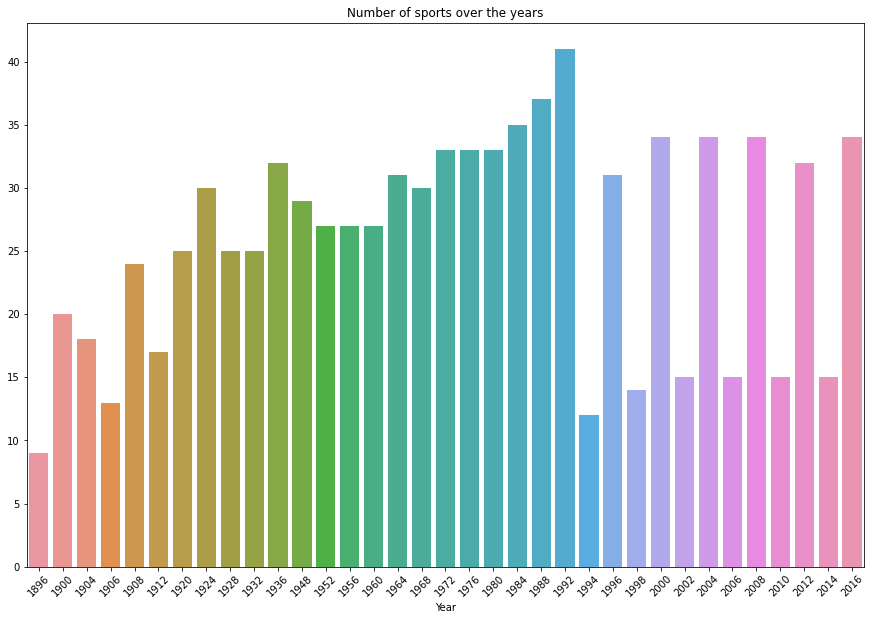

In [33]:
plt.figure(figsize =(15,10))
plt.title("Number of sports over the years")
sns.barplot(y =number_of_sports,x = df_sport_team.index.get_level_values("Year").unique())
locs, labels = plt.xticks()
x=plt.setp(labels,rotation=45)

# 4. Do some countries achieve most of their medals in certain sports only? 

In [38]:
df_athelete_events= pd.read_csv("athlete_events.csv")
df_athelete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [59]:
df_sport_team =df_athelete_events.groupby(["Team","Sport"]).count()
df_sport_team=df_sport_team.drop(df_sport_team.columns.difference(["Medal"]),1)
df_sport_team=df_sport_team[df_sport_team["Medal"]>0]
df_sport_team

c:\users\ghazal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Medal
Team                  Sport           
A North American Team Polo           4
Afghanistan           Taekwondo      2
Algeria               Athletics      9
                      Boxing         6
                      Judo           2
...                                ...
Zambia                Athletics      1
                      Boxing         1
Zimbabwe              Hockey        15
                      Swimming       7
Zut                   Sailing        3

[1828 rows x 1 columns]

In [80]:
under4=0
under7=0
under10=0
morethan10=0
number_of_sports=[]
for team, new_df in df_sport_team.groupby(level=0):
    n=len(new_df.index)
    if(n<4):
        under4+=1
    elif(n<7):
        under7+=1
    elif(n<10):
        under10+=1
    else:
        morethan10+=1
number_of_sports=[under4,under7,under10,morethan10]
number_of_sports

[414, 26, 11, 47]

[Text(0.5, 0, 'Number of sports'), Text(0, 0.5, 'Number of Countries')]

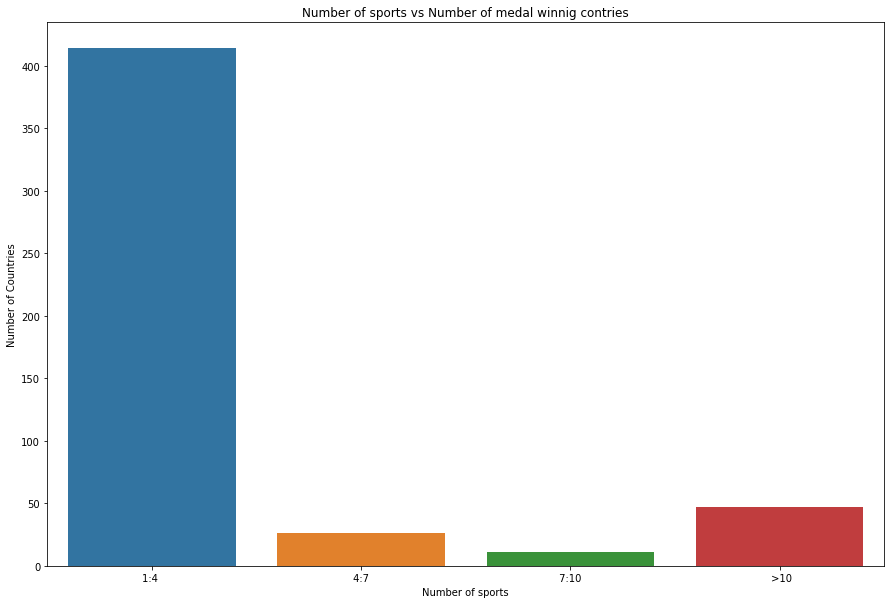

In [87]:
labels=["1:4 "," 4:7 "," 7:10 "," >10"]
plt.figure(figsize =(15,10))
plt.title("Number of sports vs Number of medal winnig contries")
ax=sns.barplot(y =number_of_sports,x = labels)
ax.set(xlabel="Number of sports",ylabel="Number of Countries")

# 6. Do countries with more female participation achieve more medals

In [90]:
df_athelete_events= pd.read_csv("athlete_events.csv")
df_athelete_events


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [91]:
df_gender_team =df_athelete_events.groupby(["Team","Sex"]).count()
df_gender_team

ID  Name  Age  Height  Weight  NOC  Games  Year  \
Team                  Sex                                                     
30. Februar           M      2     2    2       2       1    2      2     2   
A North American Team M      4     4    3       0       0    4      4     4   
Acipactli             M      3     3    3       3       3    3      3     3   
Acturus               M      2     2    1       0       0    2      2     2   
Afghanistan           F      5     5    5       5       5    5      5     5   
...                        ...   ...  ...     ...     ...  ...    ...   ...   
Zefyros               M      2     2    2       2       2    2      2     2   
Zimbabwe              F    113   113  113     101     101  113    113   113   
                      M    196   196  194     185     186  196    196   196   
Zut                   M      3     3    3       0       0    3      3     3   
rn-2                  M      5     5    5       1       1    5      5     5   

                           Season  City  Sport  Event  Medal  
Team                  Sex                                     
30. Februar           M         2     2      2      2      0  
A North American Team M         4     4      4      4      4  
Acipactli             M         3     3      3      3      0  
Acturus               M         2     2      2      2      0  
Afghanistan           F         5     5      5      5      0  
...                           ...   ...    ...    ...    ...  
Zefyros               M         2     2      2      2      0  
Zimbabwe              F       113   113    113    113     22  
                      M       196   196    196    196      0  
Zut                   M         3     3      3      3      3  
rn-2                  M         5     5      5      5      0  

[1528 rows x 13 columns]